<a href="https://colab.research.google.com/github/elliecheshire/Stop_and_Search/blob/main/Stop_Search_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction:

The following code aims to analyse the Police Stop and Search statistics of England and Wales particularly focusing on potential biases based on ethnicity.

### Data Processing:

In [ ]:
# import necessary packages to run code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

In [ ]:
# clone repository
!git clone https://github.com/elliecheshire/Stop_and_Search.git

# move into folder
%cd Stop_and_Search

# check files are present
print('Repository contains the following files:')
!ls

Cloning into 'Stop_and_Search'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 103 (delta 43), reused 2 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 26.77 MiB | 7.43 MiB/s, done.
Resolving deltas: 100% (43/43), done.
/content/Stop_and_Search/Stop_and_Search/Stop_and_Search
Repository contains the following files:
 areas-of-england-and-wales-by-ethnicity.csv
'Exploring Disparities and Trends in Police Stops and Searches of England and Wales .pptx'
 georef-united-kingdom-region-millesime.dbf
 georef-united-kingdom-region-millesime.shp
 georef-united-kingdom-region-millesime.shx
 README.md
 stop_search_07_20.xlsx
 stop_search_21_23.xlsx
 Stop_Search_analysis.ipynb


In [ ]:
# read in .xlsx files into data frames
# these .xlsx files contain all stop and search data from police forces across Endland and Wales
# data is split into 2 files based on years

data07_20 = pd.read_excel('stop_search_07_20.xlsx')

data21_23 = pd.read_excel('stop_search_21_23.xlsx')

# as these 2 datasets are from different years the formatting is inconsistent
# the data therefore needs cleaning so it can be used together

# although both datasets contain mostly the same columns these are named differently so cannot be merged

# change name of Financial Year column
data07_20.rename(columns={'Financial Year': 'financial_year'}, inplace=True)
# change name of police force area column
data07_20.rename(columns = {'Force Name': 'police_force_area'}, inplace=True)
# make all police force names consistent across each dataset (change 'and' to '&')
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('and', '&')
# change back place names containing 'and' (e.g. Midlands and Cleaveland)
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('West Midl&s', 'West Midlands')
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('Clevel&', 'Cleveland')

# change name of region column
data07_20.rename(columns = {'Region': 'region'}, inplace=True)

# change name of legislation column by removing uppercase
data07_20.rename(columns = {'Legislation': 'legislation'}, inplace=True)

# change name of Reason for Search / Arrest column
data07_20.rename(columns = {'Reason for search / arrest': 'reason_for_search'}, inplace=True)

# change name of Geocode column
data07_20.rename(columns = {'Geocode': 'geocode'}, inplace=True)

# the method for defining ethnic group in the police changed over this period
# the new style used in the 07-20 dataset can be matched to the self_defined_ethnic group column of the 21_23 dataset
# this column will be used for ethnicity in the merged dataset
# change the name of Self_defined_ethnic group to Ethnic group (self-defined - new style)
data21_23.rename(columns = {'self_defined_ethnicity_group': 'Ethnic Group (self-defined - new style)'}, inplace=True)

# change name of Searches column to number of searches
data07_20.rename(columns = {'Searches': 'number_of_searches'}, inplace=True)

# merge data sets into on dataframe
shared_columns = list(set(data07_20.columns) & set(data21_23.columns))

# create subsets of shared columns for each dataset and combine
data07_20_subset = data07_20[shared_columns]
data21_23_subset = data21_23[shared_columns]
combined_data = pd.concat([data07_20_subset, data21_23_subset])

# change name of Ethnic group column to allign with other column layouts
combined_data.rename(columns = {'Ethnic Group (self-defined - new style)': 'ethnic_group'}, inplace=True)

# replace region entries with '0' and empty entires with 'Not Stated'
combined_data['region']=combined_data['region'].str.replace('0','Not Stated')
combined_data['region']=combined_data['region'].fillna('Not Stated')
# change Easter to East of England to match other data used
combined_data['region']=combined_data['region'].str.replace('Eastern','East of England')

# ensure datasets have been combined
combined_data.head()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-175-cdd1fcf78f1d>", line 7, in <cell line: 0>
    data21_23 = pd.read_excel('stop_search_21_23.xlsx')
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 508, in read_excel
    data = io.parse(
           ^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1616, in parse
    return self._reader.parse(
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 778, in parse
    data = self.get_sheet_data(sheet, file_rows_needed)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_openpyxl.py", line 615, in get_sheet_data
    for row_n

### Stops per Year (2007-2023):

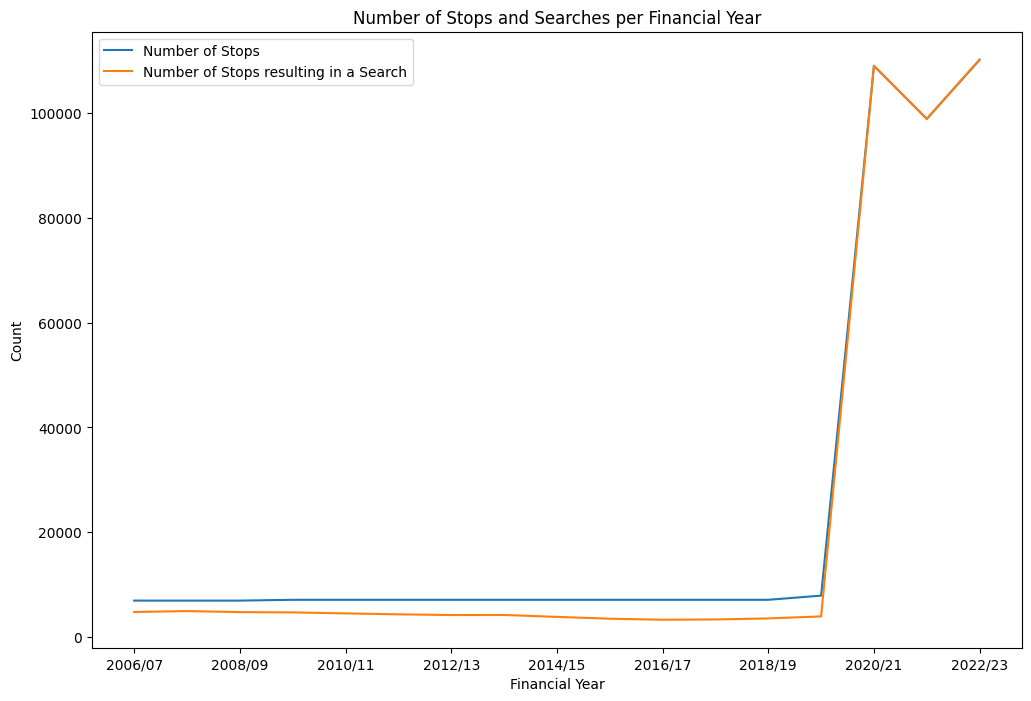

In [ ]:
# count the rows with each financial year in the combined dataset
stops_per_year = combined_data['financial_year'].value_counts()
# sort the dataframe by years in ascending order
stops_per_year.sort_index(inplace=True)

#  convert the 'number of searches' column to numeric values - any invalid values = NaN
combined_data['number_of_searches']=pd.to_numeric(combined_data['number_of_searches'],errors = 'coerce')
# fill NaN values with 0
combined_data['number_of_searches'] = combined_data['number_of_searches'].fillna(0)
# convert the column to integer values to be summed
combined_data['number_of_searches'] = combined_data['number_of_searches'].astype(int)
# group the data by 'financial_year' and calculate the number of non zero searches for each year
# this calculates only the stops that resulted in any search rather than the amount of people searched per stop
stops_to_search_per_year = combined_data.groupby('financial_year')['number_of_searches'].apply(lambda x: np.count_nonzero(x))

# plot number of stops and number of stops that resulted in searches per financial year on one graph
counts_per_year = pd.merge(stops_per_year, stops_to_search_per_year, on='financial_year')
counts_per_year.plot(kind='line',figsize = (12,8))
# add a title, axis labels and a legend
plt.title('Number of Stops and Searches per Financial Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.legend(['Number of Stops','Number of Stops resulting in a Search'])
plt.show()

###Mapping Regional Police Stops


In [ ]:
# group the data by both financial_year and region, count the number of stops in each group
# reset the index and name this new column 'number_of_stops
stops_in_region = combined_data.groupby(['financial_year', 'region']).size().reset_index(name='number_of_stops')

# define path to regions of united kingdom shapefile
shapefile_path = 'georef-united-kingdom-region-millesime.shp'
# load in the shapefile as a GeoDataFrame
map_df = gpd.read_file(shapefile_path)
# remove extra characters from strings in the 'rgm_name' column
map_df['rgn_name']=map_df['rgn_name'].apply(lambda x: x[2:-2])
# fix a mismatch in region name between the 2 datasets
map_df['rgn_name']=map_df['rgn_name'].replace('Yorkshire and The Humber', 'Yorkshire and the Humber')
# renname the column to match for merging
map_df = map_df.rename(columns={'rgn_name':'region'})
# drop unnecessary extra columns from the GeoDataFrame so only those needed for mapping are present
map_df=map_df.drop(columns = ['year','ctry_code','ctry_name','rgn_code','rgn_area_co','rgn_type'])

# merge the map data and search counts on the region column
map_merged = map_df.merge(stops_in_region, left_on=['region'], right_on=['region'])

# create animated chloropleth map, showing the number of stops in each region over time
region_map = px.choropleth(map_merged,
                           geojson=map_merged['geometry'].geometry,
                           locations=map_merged.index,
                           color='number_of_stops',
                           hover_name='region',
                           labels={'number_of_stops':'Number of Stops'},
                           color_continuous_scale='Viridis',
                           animation_frame='financial_year',
                           basemap_visible=True
)

region_map.update_geos(fitbounds='locations', visible=True)
# add a title to the plot and a colorbar
region_map.update_layout(title_text = f'Number of Police Stops by region 2006-2023',
                         coloraxis_colorbar=dict(title = 'Number of Stops'))
# center the title
region_map.update(layout = dict(title=dict(x=0.5)))
region_map.show()

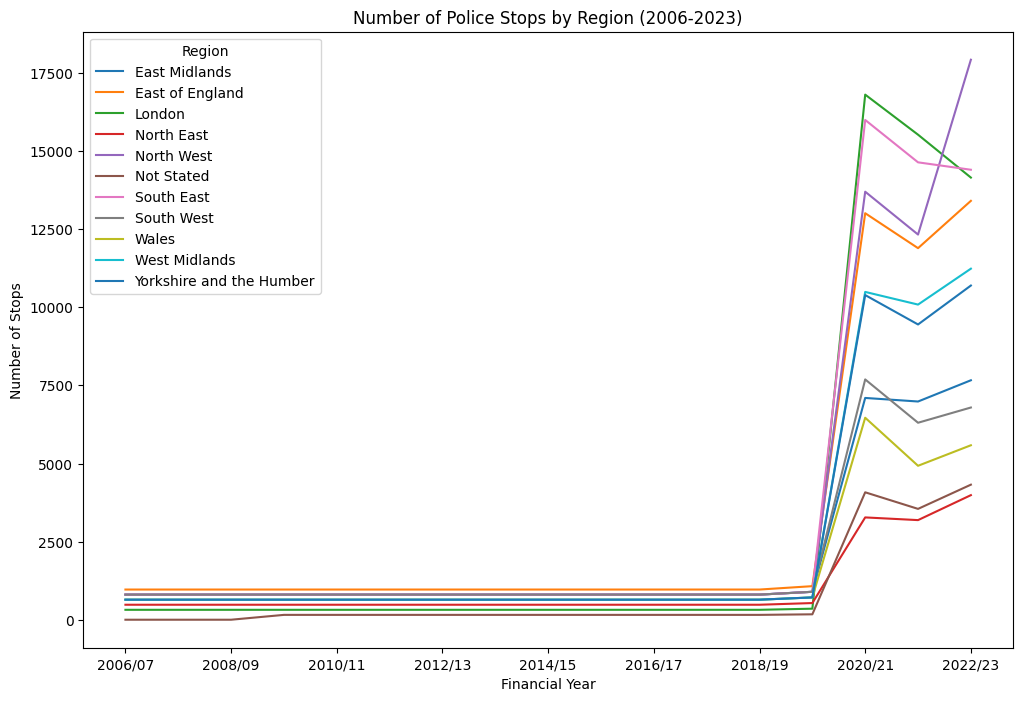

In [ ]:
# transform the dataframe into a pivot table for easier plotting
pivot_stops_in_region = stops_in_region.pivot(index='financial_year', columns = 'region', values = 'number_of_stops')

# plot the data as a line graph with a line for each region
pivot_stops_in_region.plot(kind='line',figsize = (12,8))
# add a title, axis and a legend
plt.title('Number of Police Stops by Region (2006-2023)')
plt.xlabel('Financial Year')
plt.ylabel('Number of Stops')
plt.legend(title='Region')
plt.show()

### Number of Stops by Ethnic Group:


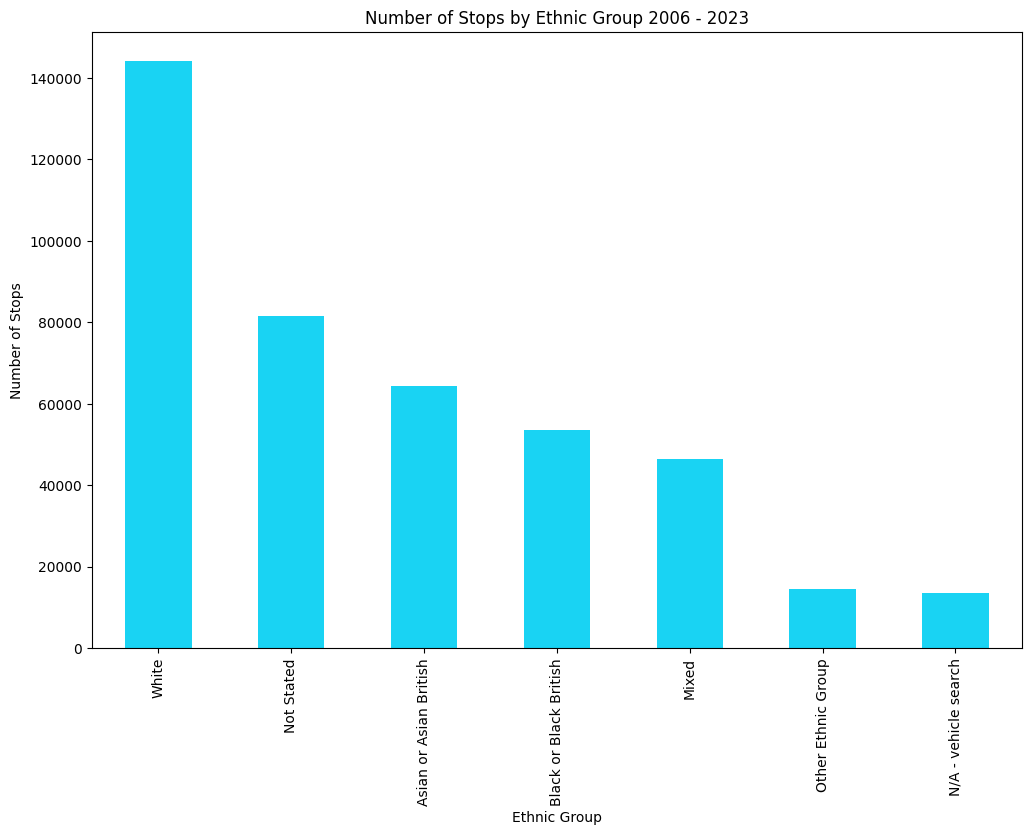

In [ ]:
# count the number of values in the column ethnic_group to work out the number of stops
ethnic_group_stops = combined_data['ethnic_group'].value_counts()
# plot a bar chart of these values
ethnic_group_stops.plot(kind = 'bar', figsize= (12,8),color = '#19D3F3')
# add a title and axis labels
plt.title('Number of Stops by Ethnic Group 2006 - 2023')
plt.xlabel('Ethnic Group')
plt.ylabel('Number of Stops')
plt.show()

### Ethnic Group population of England and Wales compared to percentage of Police stops by Ethnic Group:

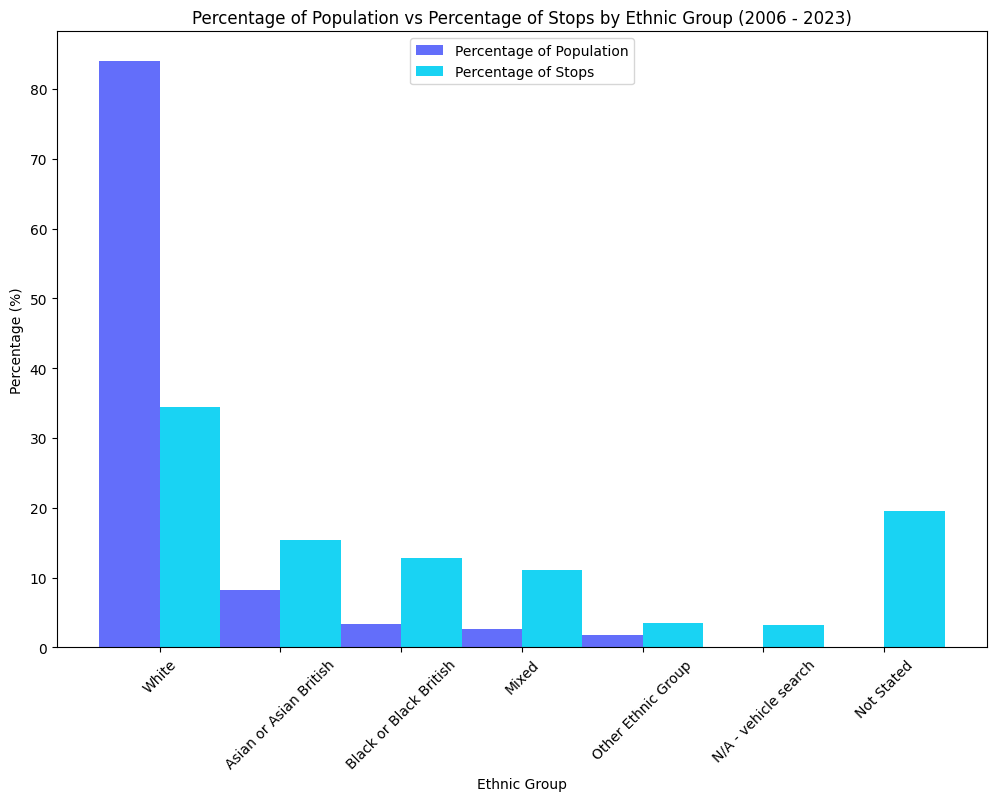

In [ ]:
# replace 'Not stated' with 'Not Stated' and 'Vehicle only' to 'N/A - vehicle search'
combined_data['ethnic_group']=combined_data['ethnic_group'].str.replace('Not stated', 'Not Stated')
combined_data['ethnic_group']=combined_data['ethnic_group'].str.replace('Vehicle only', 'N/A - vehicle search')

# convert to a dataframe so the index becomes a column named 'ethnic_group' and the values are in a column called 'count'
ethnic_group_stops = pd.DataFrame({'ethnic_group': ethnic_group_stops.index, 'count': ethnic_group_stops.values})
# sum the number of stops in the 'count'column to work out the total stops
total_stops = ethnic_group_stops['count'].sum()

# read in regional ethnicity data
regional_ethnicity = pd.read_csv("areas-of-england-and-wales-by-ethnicity.csv")
# rename columns for continuity between this dataset and the 'combined_data' dataset
regional_ethnicity.rename(columns = {'Ethnicity': 'ethnic_group'}, inplace=True)
regional_ethnicity.rename(columns = {'Geography': 'region'}, inplace = True)
regional_ethnicity.rename(columns = {'%':"population_percentage"}, inplace = True)

# create a mapping dictionary to make sure the ethnic group names are the same in both datasets
ethnicity_mapping = {"Black":"Black or Black British",
                     "Asian": "Asian or Asian British",
                     "White British": "White",
                     "White other": "White",
                     "Other": "Other Ethnic Group"}
# apply the mapping to the regional_ethnicit_dataset so the ethnic group names match the other data
regional_ethnicity['ethnic_group'] = regional_ethnicity['ethnic_group'].replace(ethnicity_mapping)

# group the data by region and ethnic_group and sum the 'population_percentage' for each group
regional_ethnicity = regional_ethnicity.groupby(['region','ethnic_group'], as_index=False).agg({'population_percentage':'sum'})

# calculate the total percentages for each ethnic group by adding the percentages across all regions
ethnicity_population = regional_ethnicity.groupby('ethnic_group')['population_percentage'].sum()

# calculate the total population overall
total_percentage = ethnicity_population.sum()

# convert each ethnic group's total population percentage to a percentage of the overall population
ethnicity_population = (ethnicity_population / total_percentage) * 100

# calculate the percentage of stops for each ethnic group using the number of stops they experience and the total stops overall
ethnic_group_stops['search_percentage'] = (ethnic_group_stops['count'] / total_stops) * 100

# merge the dataframes with the number of stops and the demographic of the population together
ethnic_group_stops = pd.merge(ethnic_group_stops, ethnicity_population, on = 'ethnic_group', how = 'left')

# create a custom order for bars so the 'Not Stated' and 'N/A - vehicle search' appear last
custom_order = ['White', 'Asian or Asian British', 'Black or Black British', 'Mixed', 'Other Ethnic Group', 'N/A - vehicle search', 'Not Stated']
# order the data using this custom order
ethnic_group_stops['ethnic_group'] = pd.Categorical(ethnic_group_stops['ethnic_group'], categories = custom_order, ordered = True)
ethnic_group_stops = ethnic_group_stops.sort_values('ethnic_group')

# create a bar chart of this combined data with 2 bars for each ethnic group one showing the percentage of the population and one showing the percentage of stops that ethnicity experience
plt.figure(figsize = (12,8))
pop_stops_graph = plt.axes()
barwidth = 0.5

pop_stops_graph.bar(np.arange(len(ethnic_group_stops['ethnic_group'])) - barwidth/2, ethnic_group_stops['population_percentage'],width = barwidth, label = 'Percentage of Population', color = '#636EFA')
pop_stops_graph.bar(np.arange(len(ethnic_group_stops['ethnic_group']))+ barwidth/2, ethnic_group_stops['search_percentage'], width = barwidth, label = 'Percentage of Stops', color = '#19D3F3')
# add axis labels and format axis for easier reading
pop_stops_graph.set_xlabel('Ethnic Group')
pop_stops_graph.set_ylabel('Percentage (%)')
pop_stops_graph.set_xticks(np.arange(len(ethnic_group_stops['ethnic_group'])))
pop_stops_graph.set_xticklabels(ethnic_group_stops['ethnic_group'], rotation=45)
# add title and legend
plt.title('Percentage of Population vs Percentage of Stops by Ethnic Group (2006 - 2023)')
plt.legend()
plt.show()

### Regional Population by Ethnic Group

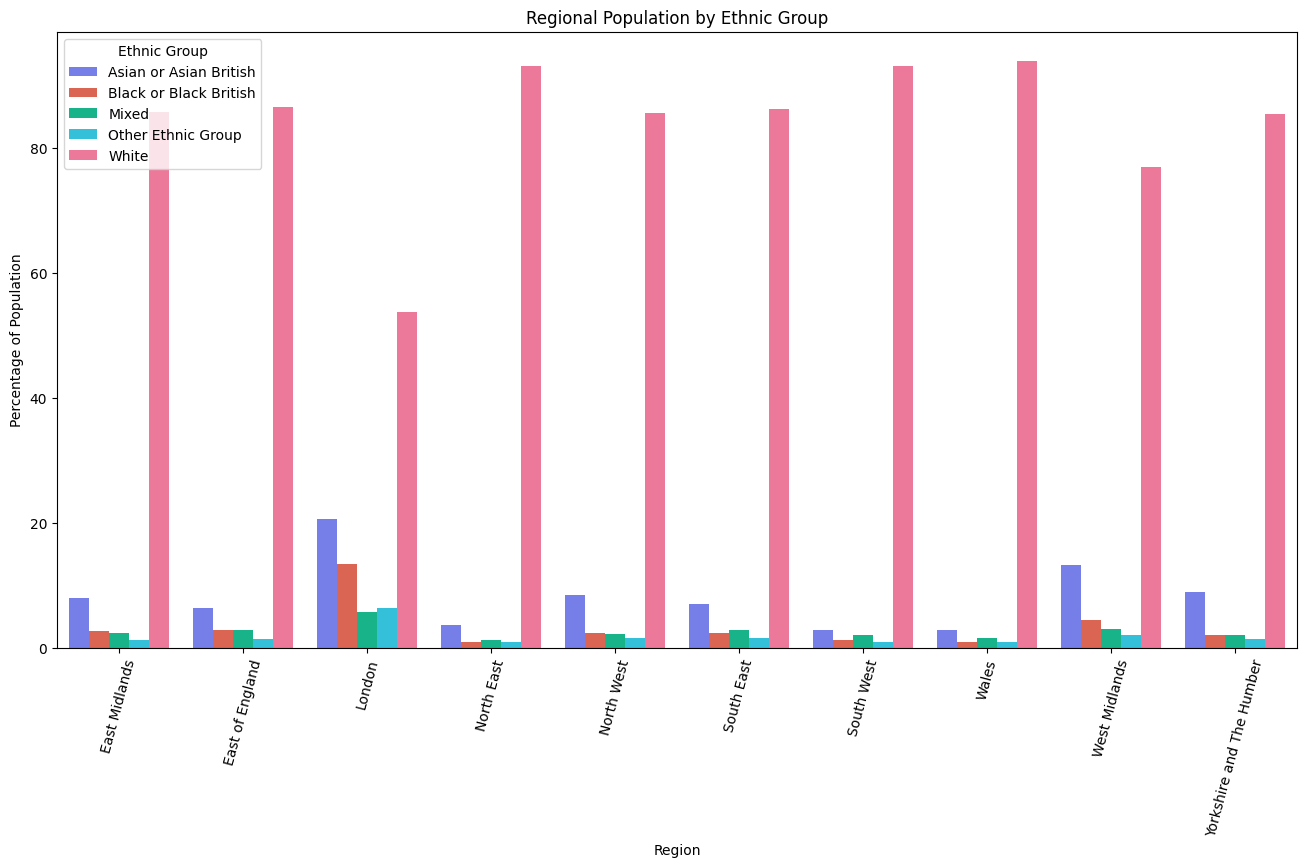

In [ ]:
# create a custom colour palette so that ethnic group colours remain consistent in the graphs
custom_palette = {'White':'#FF6692',
                  'Asian or Asian British':'#636EFA',
                  'Black or Black British':'#EF553B',
                  'Mixed':'#00CC96',
                  'Other Ethnic Group':'#19D3F3',
                  'N/A - vehicle search':'#AB63FA',
                  'Not Stated':'#FFA15A'
                  }

# plot a grouped bar plot of the regional population by ethnic group
# using the chosen specific colours to distinguish between ethnicity
plt.figure(figsize=(16,8))
sns.barplot(
    data = regional_ethnicity,
    x='region',
    y='population_percentage',
    hue='ethnic_group',
    palette=custom_palette
)
# add a title, axis labels and legend
plt.title('Regional Population by Ethnic Group')
plt.xlabel('Region')
plt.ylabel('Percentage of Population')
plt.legend(title='Ethnic Group')
plt.xticks(rotation=75)
plt.show()

###Ethnic group population and Search population by region

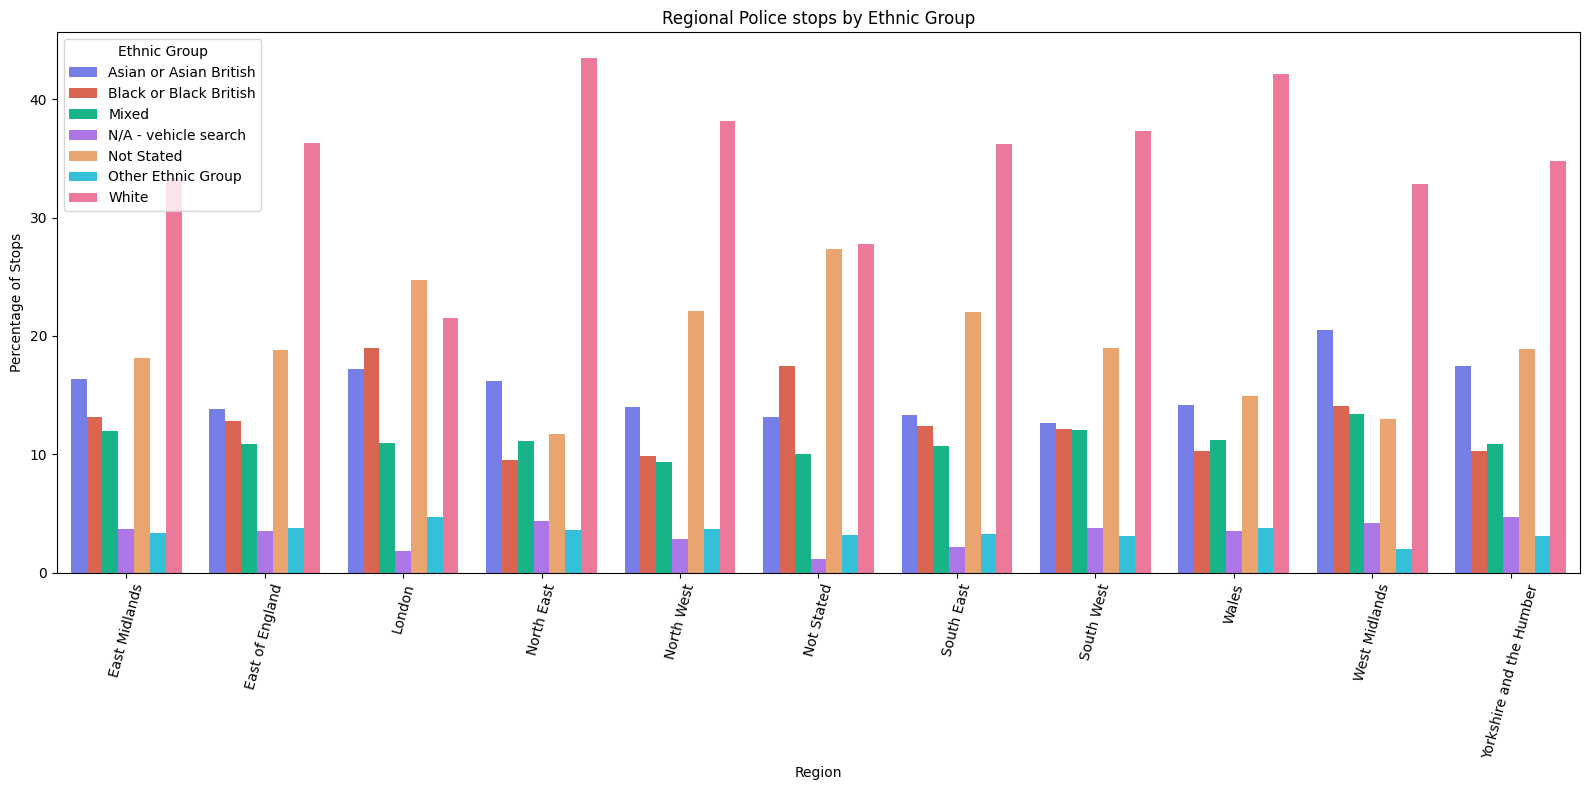

In [ ]:
# group the combined_data dataset by region and ethnic group
# count the number of stops
region_summary = combined_data.groupby(['region','ethnic_group']).size().reset_index(name='Stops')

# group the region_total_stops data by region and sum these stops to determine the total number of stops by region
region_total_stops = region_summary.groupby('region')['Stops'].sum().reset_index(name = 'Total Stops in Region')

# merge the region_total_stops dataframe into the region_summary dataframe
region_summary = pd.merge(region_summary, region_total_stops, on='region', how='left')
# create a 'percentage of stops' column and calculate the percentage for each row
region_summary['Percentage of Stops'] = (region_summary['Stops'] / region_summary['Total Stops in Region']) * 100
region_summary

# plot a graph of the percentage of stops for each ethnic group grouped for each region
plt.figure(figsize=(16,8))
sns.barplot(
    data = region_summary,
    x='region',
    y='Percentage of Stops',
    hue='ethnic_group',
    palette=custom_palette
)
# add a title, axis labels and legend
plt.title('Regional Police stops by Ethnic Group')
plt.xlabel('Region')
plt.ylabel('Percentage of Stops')
plt.legend(title='Ethnic Group')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### Comparison of Percentage of Population and Percentage of Stops by Ethnic Group

In [ ]:
# merge the regional police stop data and regional ethnicity data
region_ethnicity_stacked = pd.merge(regional_ethnicity,
                                    region_summary [['region','ethnic_group','Percentage of Stops']],
                                    on = ['region','ethnic_group'])
# put the data frame into long format and create identifier variables
region_ethnicity_stacked = region_ethnicity_stacked.melt(
                              id_vars=['region','ethnic_group'],
                              value_vars=['population_percentage','Percentage of Stops'],
                              var_name='Category',
                              value_name='Percentage')

# change 'population_percentage' to 'Percentage of Population' in the 'category' column to make it a better title for the graph
region_ethnicity_stacked['Category']=region_ethnicity_stacked['Category'].str.replace('population_percentage','Percentage of Population')
# rename columns for better graph titles
region_ethnicity_stacked = region_ethnicity_stacked.rename(columns={'ethnic_group':'Ethnic Group','region':'Region'})

# plot 2 bar charts of stacked bars for each region
# 1 with the category 'Percentage of Population' and the other 'Percentage of Stops'
# bars are split into ethnic group (with matching colour pallete as before)
region_ethnicity_compare = px.bar(region_ethnicity_stacked,
                                  x='Region',
                                  y='Percentage',
                                  color='Ethnic Group',
                                  facet_col='Category',
                                  barmode='stack',
                                  color_discrete_map=custom_palette)

# update graph to add axis titles and a centered title
region_ethnicity_compare.update_layout(
    margin=dict(t=100),
    xaxis_title='Region',
    yaxis_title='Percentage',
    title='Percentage of Population vs Percentage of Stops by Ethnic Group',
    title_x = 0.5
)



### Legislation used for search by Ethnic group



In [ ]:
# group combined_data by both 'legislation' and 'ethnic_group' and count the number of stops
legislation_summary = combined_data.groupby(['legislation', 'ethnic_group']).size().reset_index(name='count')
# calculate the percentage of stops using each legislation for every ethnic group
legislation_summary['percentage']=(legislation_summary['count']/legislation_summary.groupby('legislation')['count'].transform('sum')) *100

# plot a stacked bar chart of each legislation split by ethnic_group using percentage for the y axis
legislation_plot = px.bar(legislation_summary,
                          x='legislation',
                          y='percentage',
                          color='ethnic_group',
                          barmode='stack',
                          labels={'legislation':'Legislation','percentage':'Percentage (%)','ethnic_group':'Ethnic Group'})
# add a centered title
legislation_plot.update_layout(title='Legislation cited for Police Stops by Ethnic Group',
                               title_x = 0.5)



Section 1 (PACE): provides police with a power to stop and search a person or vehicle where they have reasonable grounds to suspect they will find prohibited items.

Section 44/47a (TACT): provides police with the power to stop and search  when they have reasonable suspicion that an act of terrorism will take place.

Section 60 (CJPOA): provides police with the power to stop and search individuals for weapons or dangerous instruments, where and authorisation has been granted. (no need for suspicion)